Vector samples, scalar labels

A  stack of fully connected `relu`-activated layers performs well

A stack of fully connected `relu`-activated layer is expepced to perform well with vector samples and scalar labels.

`Dense(16, activation='relu')`

This layer transforms an input tensor into a 1D tensor of length 16 - equivalent to a 16 dimensional vector

This 'dense' layer transforms an input tensor into a 1D tensor of length 16 - equivalent to a 16 dimensional vector

The number of elements in a vector is the 'dimension' or 'length' of the vector - easily confused with the dimension of a tensor, which is the number of axes of that tensor

The representational space of this layer has 16 dimensions - the layer has 16 **(hidden) units**

The number of elements in a vector is the 'dimension' or 'length' of the vector - easily confused with the dimension of a tensor, which is the number of axes of that tensor. The representational space of this layer has 16 dimensions - the input is transformed into a 16 element vector. The layer has 16 **(hidden) units**. What is a unit?

A unit is a throwback to the days when artificial neural networks were based on biological neural networks

A unit is the computational analogue of the neuron

This layer performs a geometric transformation resulting in a point in 16 dimensional space

A unit is a throwback to the days when artificial neural networks were based on biological neural networks. A unit is the computational analogue of the neuron. This layer performs a geometric transformation resulting in a point in 16 dimensional space. 16 units, 16 dimensional output - that's all you need know. Modern deep learning regards the layer and not the unit as fundamental.

`Dense(16, activation='relu')` implements `output = relu(dot(w, input) + b)`

The weight parmeters are stored in a 2D tensor of shape `(n, 16)` where `n` is the length of the input 1D tensor

The bias tensor has shape `(16,)`

`Dense(16, activation='relu')` implements the transformation `relu(dot(w, input) + b)`. The weight parmeters are stored in a 2D tensor of shape `(n, 16)` where `n` is the length of the input 1D tensor; the bias tensor has shape `(16,)`

TensorFlow knows how to correctly match axes in the `dot` and `+` operations

The mathematical analogue...

\begin{align*}
z &= w \cdot x + b \\
z_i &= \sum_{j = 1}^{16} w_{ij}x_j + b_i, \quad i = 1, 2\ldots, n
\end{align*}

| $z$ | $=$ | $w$ | $\cdot$ | $x$ | $+$ | $b$ |
|:-----:|:-----:|:-----:|:---------:|:-----:|:-----:|:-----:|
|$16 \times 1$ | | $ 16 \times n$ | |$n \times 1$|  | $16 \times 1$ |

\begin{align*}
z^T &= x^T \cdot w^T + b^T \\
z_i^T &= \sum_{j = 1}^{16} x_j^T w_{ji}^T + b_i^T, \quad i = 1, 2\ldots, n
\end{align*}

| $z^T$ | $=$ | $x^T$ | $\cdot$ | $w^T$ | $+$ | $b^T$ |
|:-----:|:-----:|:-----:|:---------:|:-----:|:-----:|:-----:|
|$1 \times 16$ | | $ 1 \times n$ | |$n \times 16$|  | $1 \times 16$ |



And in code...

In [1]:
# a three unit layer
import numpy as np
units = 3
len_input = 2
w = np.random.randint(4, size=(len_input, units))
b = np.random.randint(4, size=(units))
x = np.random.randint(5, size=(len_input,))
y = np.zeros([units,])

for j in range(units):
    for i in range(len_input):
        y[j] += x[i] * w[i][j]
    y[j] += b[j]    
print('w=\n', w, '\nb=', b, '\nx=', x, '\ny=', y, sep='') 

w=
[[3 1 1]
 [3 0 1]]
b=[1 0 2]
x=[4 0]
y=[13.  4.  6.]


How many hidden units?

More hidden units means more complex representations can be learned but

- the network is computationally more expensive 
- the network might fit the training data too tightly and performance on the test set degrades

How many hidden units? More hidden units means more complex representations can be learned but the network is computationally more expensive and the network might fit the training data too tightly. Overfitting means test set performance degrades. More on that later.

Choose two intermediate `relu` layers of 16 hidden units 

A third sigmoid layer to output a 'probability

We will choose two intermediate `relu` layers of 16 hidden units and a final sigmoid layer. Sigmoid layers output probability distributions.

In [2]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Our network. Depth three. Notice that the final layer has a single unit - it ouputs a one dimensional vector i.e. a scalar. 

Why apply an activation function?

Suppose `output = dot(W, input) + b`

Only affine transformations can be learnt



Let's stop there and consider why we even have activation functions at all. Well without activations, layers would only perform affine transformations.

The hypothesis space of a unactivated layer is the set of all possible affine transformations

A stack of unactivated layers (series of affine transformations) has the same hypothesis space 

The hypothesis space of a unactivated layer is the set of all possible affine transformations. A stack of unactivated layers (series of affine transformations) has the same hypothesis space - nothing has been gained!

An affine hypothesis space is representationally limited

Much richer to apply a non-linear transformation such as `relu` (most popular) and `sigmoid`

An affine hypothesis space is representationally limited. Activated layers, though, are much richer, The activation must be non-linear: for example, `relu` (most popular) and `sigmoid`.

`relu(x)` zeros out negative values:

\begin{align*}
f_{\text{relu}}(x) = \max(0, x)
\end{align*}

`relu`s, you remember, zero out negative values.

In [4]:
def plot_relu():
    x = np.linspace(-2, 2, 101)
    import matplotlib.pyplot as plt
    plt.plot(x, np.maximum(0, x))
    plt.show()

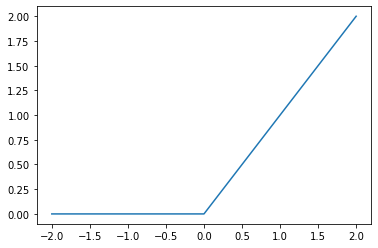

In [5]:
plot_relu()

The relu function.

The sigmoid squashes output to $[0, 1]$:

\begin{align*}
f_{\text{sigmoid}}(x) = \frac{1}{1 + e^{-x}}
\end{align*}

Sigmoid, on the other hand, squashes.

In [6]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x)) 

def plot_sigmoid():
    x = np.linspace(-10, 10, 101)

    import matplotlib.pyplot as plt
    plt.plot(x, sigmoid(x))
    plt.show()

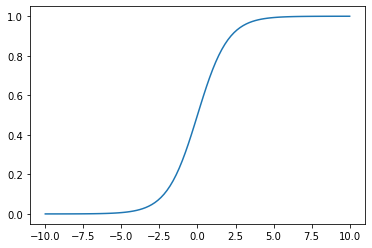

In [7]:
plot_sigmoid()

The form of the sigmoid function.

Loss and optimiser?

This is a binary classification problem and the network output is a 'probability'

The binary cross-entropy is the preferred choice

Choose `RMSprop` - SGD with momentum

There are still choices to be made. What about loss and optimiser? This is a binary classification problem and the network output is a 'probability'. The binary cross-entropy is the preferred loss. We choose the `RMSprop` optimser, an SGD algorithm with momentum.

The cross entropy loss function is the sum of

\begin{align*}
f_{sample} = - y \log y_{pred} - (1 - y) \log (1 - y_{pred}) 
\end{align*}

over the mini-batch

- sample $x$ 
- target $y$
- network output $y_{pred}$

The cross entropy loss function is defined by this complicated looking formula. $f_{sample}$ is summed over each sample of the mini-batch. 

- counteracts slowdown
- Michael Nielsen's free online book Neural Networks and Deep Learning

The cross entropy was introduced to counteract learning 'slowdown'. We won't go into that right here, but Michael Nielsen's free online book Neural Networks and Deep Learning provides an exceptionally clear explanation.

But what we will do is explain why the cross entropy is a possible loss function. Remember that a loss function has to be zero when prediction equals target, and positive otherwise. And SGD demands that the loss is smooth.  

\begin{align*}
f_{sample} = - y \log y_{pred} - (1 - y) \log (1 - y_{pred}) 
\end{align*}


\begin{align*}
y = 0 \Rightarrow f_{sample} &= -\log(1 - y_{pred}) \\ 
                             &= 0\quad (y_{pred} = 0)
\end{align*}

The labels, $y$, are either 0 or 1 because this is binary classification. If $y = 0$ and $y_{pred} = 0$ then $f_{sample} = 0$ because $\log(1) = 0$. 

\begin{align*}
f_{sample} = - y \log y_{pred} - (1 - y) \log (1 - y_{pred}) 
\end{align*}


\begin{align*}
y = 1 \Rightarrow f_{sample} &= -\log y_{pred} \\
                                &= 0 \quad (y_{pred} = 1)
\end{align*}  

And if  $y = 1$ and $y_{pred} = 1$ then $f_{sample} = 0$. So the loss is zero when prediction agrees with label. 

- $\log y_{pred} \le 0$ 
- $\log (1 - y_{pred}) \le 0$
- $-y \log y_{pred} - (1 - y) \log (1 - y_{pred}) \ge 0$

Suppose that $y_{pred} \ne y$. The logarithms are negative because $y_{pred}$ is the sigmoid output, and sigmoids give values between 0 and 1. The minus signs in the definition ensure that sample cross entropy is greater than 0. So the cross entropy does measure a positive loss when $y_{pred}$ does not agree with the label. The binary cross-entropy is indeed differentiable, although I won't demonstrate that here! Once more, Nielsen's book has a thorough explanation.  

In [8]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

The compilation step with loss, optimiser and monitoring metric.

In [9]:
from tensorflow.keras import optimizers, losses
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = ['accuracy'])

Optimiser and loss can be customised. In that case we would pass function objects, as in this example. Incidentally, the `RMSprop` learning rate has been set to 0.001. 